In [1]:
#와인데이터 불러오기.
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [2]:
wine.head() #class가 0이면 레드와인, 1이면 화이트와인
#화이트와인이 양성 클래스이다. 즉 전체에서 화이트와인을 골라내는 문제.

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
#describe()메서드를 사용하여 열에대한 통계 출력
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
#세개 feature(특성)의 scale이 다르므로 StandardScaler클래스를 사용해 표준화한다.
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
#로지스틱회귀훈련.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
#score가 너무 낮게 나왔다.

0.7804502597652492
0.7776923076923077


In [ ]:
#계수와 y절편 확인하기.
print(lr.coef_, lr.intercept_)

# 결정트리

In [10]:
#결정트리 모델은 이유를 설명하기 쉽다.
#DecisionTreeClassifier클래스를 사용한다.
#결정트리 모델은 스무고개와 비슷해서 질문을 계속 추가해 분류 정확도를 높일 수 있다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#과대적합된 모델

0.996921300750433
0.8592307692307692


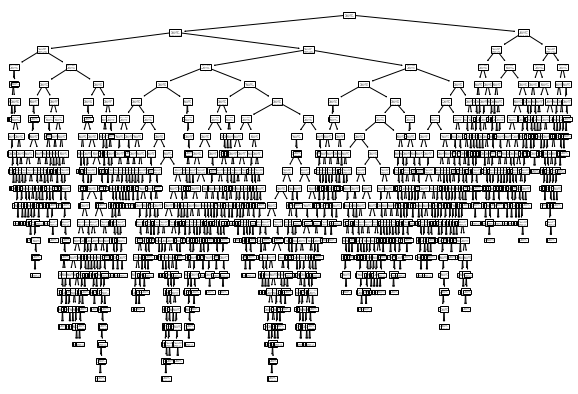

In [11]:
#plot_tree()함수를 사용해 트리를 그림으로 출력한다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

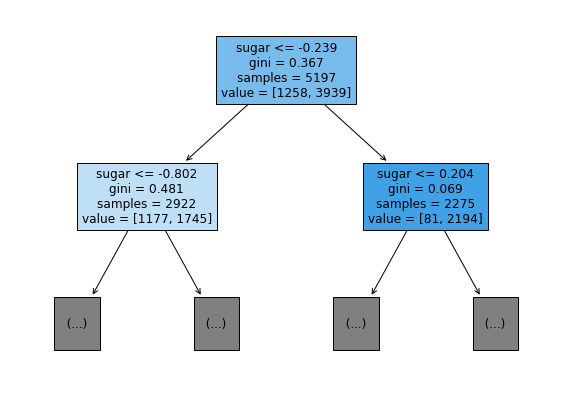

In [12]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) 
#max_depth : root노드를 제외한 확장노드. filled : 클래스에맞게 색을바꿈.
plt.show()

In [14]:
#결정트리 가지치기 하기.
dt = DecisionTreeClassifier(max_depth=3, random_state=42) #max_depth매개변수를 사용하여 트리의 깊이를 설정한다.
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


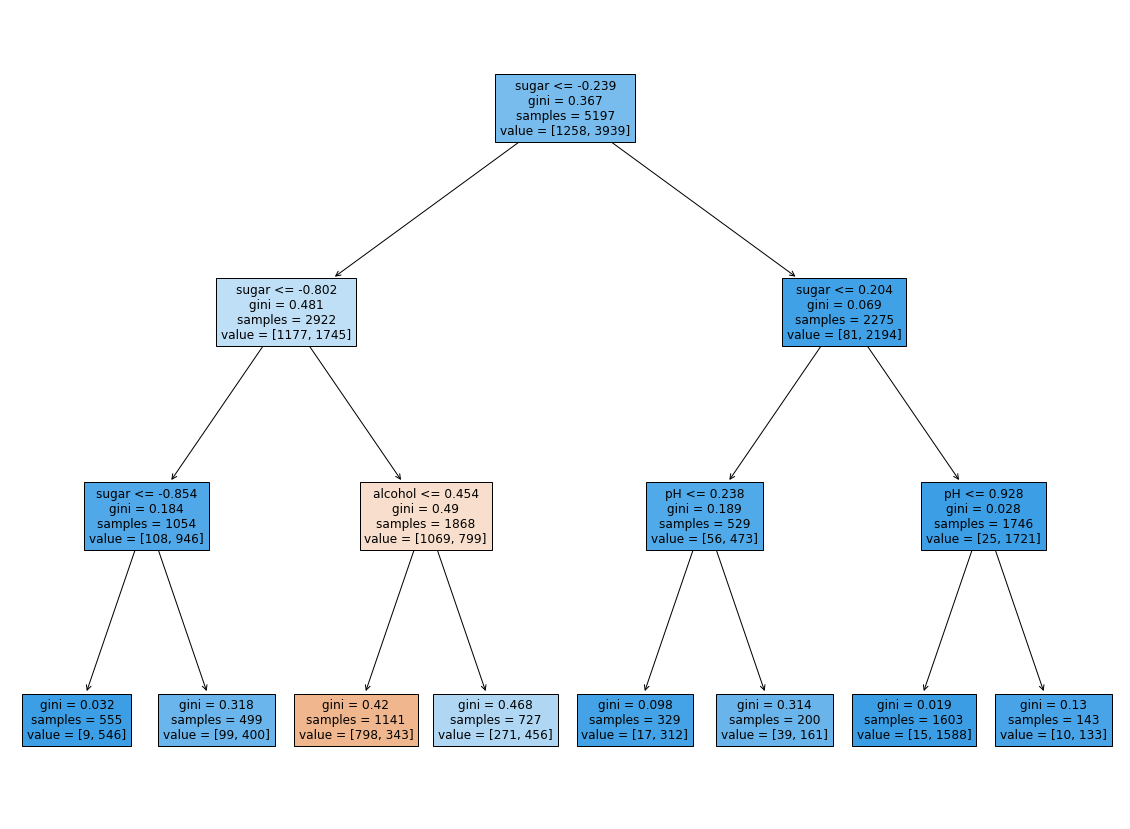

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [17]:
#전처리 하지 않고 트리 사용하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


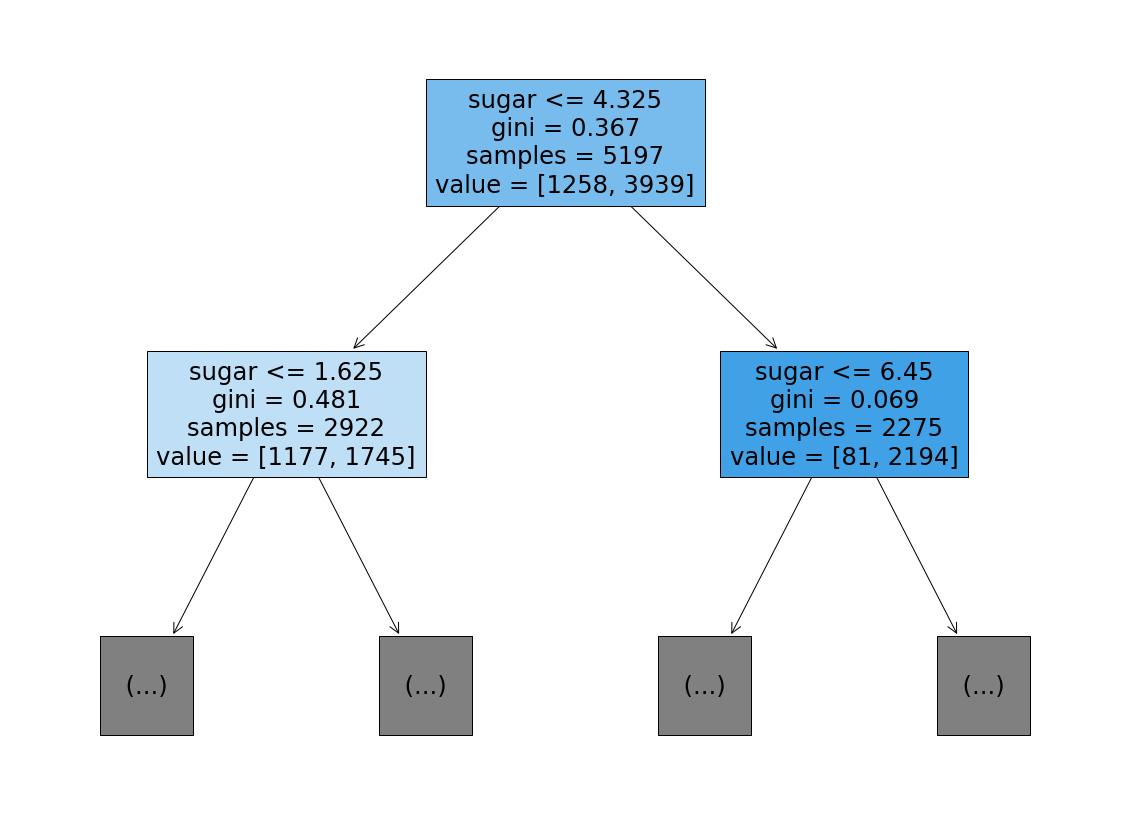

In [23]:
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [20]:
#특성의 중요도.
print(dt.feature_importances_) #가운데있는 특성이 가장 중요도가 높다.

[0.12345626 0.86862934 0.0079144 ]
